In [5]:
import funcs

In [6]:
import mne
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
raw=mne.io.read_raw_brainvision('FZ006_intensity.vhdr', preload=True)
raw.filter(0.1, 40.,phase='zero-double');

Using matplotlib as 2D backend.


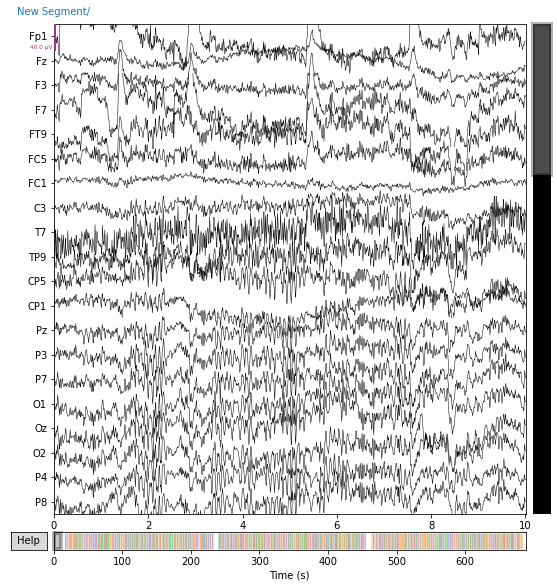

In [ ]:
raw.plot();

In [ ]:
raw.set_montage('standard_1020')

<RawBrainVision | FZ006_intensity.eeg, 65 x 344120 (688.2 s), ~170.7 MB, data loaded>

In [ ]:
events=mne.events_from_annotations(raw)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4']


In [ ]:
events[1]

{'New Segment/': 99999,
 'Stimulus/S  1': 1,
 'Stimulus/S  2': 2,
 'Stimulus/S  3': 3,
 'Stimulus/S  4': 4}

In [ ]:
epochs=mne.Epochs(raw, events[0])
epochs.average().plot();

Not setting metadata
Not setting metadata
721 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


In [ ]:
list_of_bads=['FC2']

In [ ]:
raw.info['bads']=list_of_bads
raw.interpolate_bads()

In [ ]:
raw.set_eeg_reference(ref_channels='average');

In [ ]:
ica = mne.preprocessing.ICA(n_components=20, random_state=97)
ica.fit(raw)
ica.plot_components(picks=range(20), inst=raw);
ica.plot_sources(raw);

In [ ]:
ica_exclude=[0,1,2]

ica.exclude=ica_exclude
ica.apply(raw)

In [ ]:
epochs=mne.Epochs(raw, events[0], event_id={'80dB':1, '70dB':2,'60dB':3, '50dB':4},
                  #reject=dict(eeg=150e-6), 
                  baseline=(-0.2, 0.0), tmin=-0.5, tmax=0.8, preload=True)

In [ ]:
mne.viz.plot_compare_evokeds({'50dB':epochs['50dB'].average(),
                              '60dB':epochs['60dB'].average(),
                              '80dB':epochs['80dB'].average(),
                             }, axes='topo');

In [ ]:
funcs.drop_epochs_by_sigma(epochs, 3)

In [ ]:
epochs.save('FZ006-epo.fif')

In [ ]:
mne.viz.plot_compare_evokeds({'50dB':epochs['50dB'].average(),
                              '60dB':epochs['60dB'].average(),
                              '80dB':epochs['80dB'].average(),
                             }, axes='topo');